In [1]:
using BeamLib: IsotropicArray, steer, bartlett
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steer(pa, fc, Θ')*[s1; s2]
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n
Rxx = 1/size(X)[2] * X*X'

# Bartlett spectrum 
# Same as steering dsb_weights
# but using the bartlett function is more convenient for
# DoA estimation
ϕaxis = LinRange(-90, 90, 360)
P = bartlett(pa, Rxx, fc, deg2rad.(ϕaxis'))

360-element Vector{Float64}:
 8.450852024489409
 8.45062635173723
 8.449947469125792
 8.4488097863393
 8.447203995368795
 8.445117084361824
 8.442532357158406
 8.4394294586589
 8.435784406208905
 8.43156962722512
 ⋮
 8.457008394601305
 8.453723834481753
 8.45081960208712
 8.44832042577136
 8.446247201577181
 8.444617006791544
 8.44344311141764
 8.442734987334465
 8.44249831496619

In [2]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(P).indices]

2-element Vector{Float64}:
 10.779944289693589
 76.46239554317549

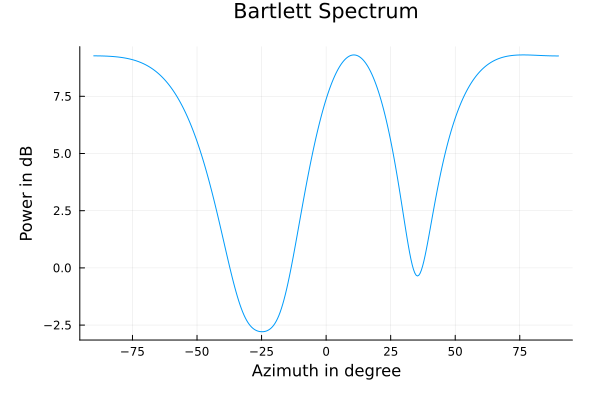

In [3]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(P))
plot!(title="Bartlett Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")